In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn 

In [2]:
print(sklearn.__version__)

1.2.2


In [3]:
df = pd.read_csv(r"new_model.csv")
df.head()

,Bp,Sg,Al,Su,Rbc,Bu,Sc,Sod,Pot,Hemo,Wbcc,Rbcc,Htn,Class
0,80.0,1.020,1.0,0.0,1.0,36.0,1.2,137.53,4.63,15.4,7800.0,5.20,1.0,1
1,50.0,1.020,4.0,0.0,1.0,18.0,0.8,137.53,4.63,11.3,6000.0,4.71,0.0,1
2,80.0,1.010,2.0,3.0,1.0,53.0,1.8,137.53,4.63,9.6,7500.0,4.71,0.0,1
3,70.0,1.005,4.0,0.0,1.0,56.0,3.8,111.00,2.50,11.2,6700.0,3.90,1.0,1
4,80.0,1.010,2.0,0.0,1.0,26.0,1.4,137.53,4.63,11.6,7300.0,4.60,0.0,1


In [4]:
df.tail()

,Bp,Sg,Al,Su,Rbc,Bu,Sc,Sod,Pot,Hemo,Wbcc,Rbcc,Htn,Class
395,80.0,1.020,0.0,0.0,1.0,49.0,0.5,150.0,4.9,15.7,6700.0,4.9,0.0,0
396,70.0,1.025,0.0,0.0,1.0,31.0,1.2,141.0,3.5,16.5,7800.0,6.2,0.0,0
397,80.0,1.020,0.0,0.0,1.0,26.0,0.6,137.0,4.4,15.8,6600.0,5.4,0.0,0
398,60.0,1.025,0.0,0.0,1.0,50.0,1.0,135.0,4.9,14.2,7200.0,5.9,0.0,0
399,80.0,1.025,0.0,0.0,1.0,18.0,1.1,141.0,3.5,15.8,6800.0,6.1,0.0,0


In [5]:
df.shape

(400, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Bp      400 non-null    float64
 1   Sg      400 non-null    float64
 2   Al      400 non-null    float64
 3   Su      400 non-null    float64
 4   Rbc     400 non-null    float64
 5   Bu      400 non-null    float64
 6   Sc      400 non-null    float64
 7   Sod     400 non-null    float64
 8   Pot     400 non-null    float64
 9   Hemo    400 non-null    float64
 10  Wbcc    400 non-null    float64
 11  Rbcc    400 non-null    float64
 12  Htn     400 non-null    float64
 13  Class   400 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 43.9 KB


C:\Users\rishu\anaconda3\lib\site-packages\seaborn\distributions.py:1106: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


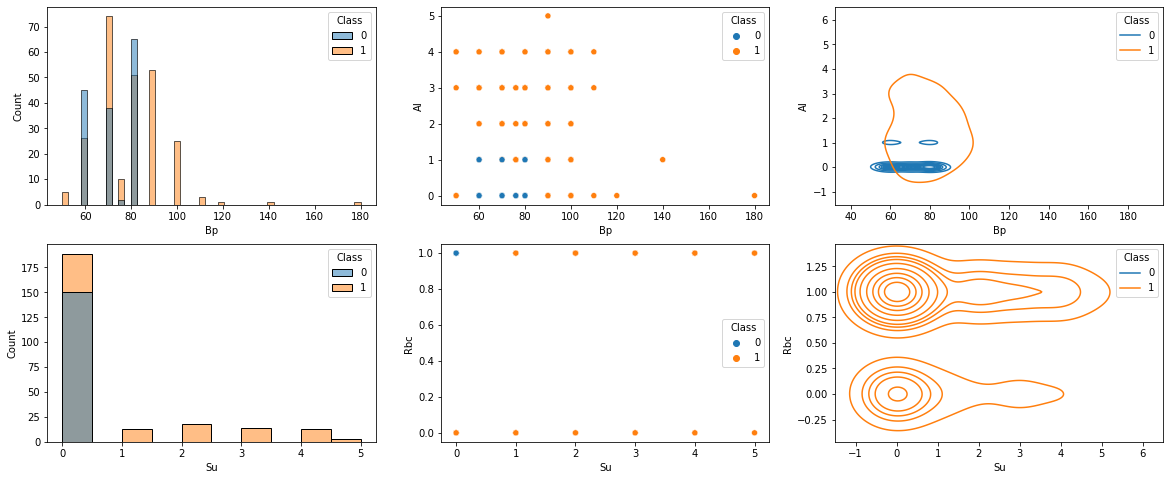

In [7]:
plt.figure(figsize=(20,8))
plt.subplot(2,3,1)
sns.histplot(x=df['Bp'],hue=df['Class'])

plt.subplot(2,3,2)
sns.scatterplot(x=df['Bp'],y=df['Al'],hue=df['Class'])

plt.subplot(2,3,3)
sns.kdeplot(x=df['Bp'],y=df['Al'],hue=df['Class'])

plt.subplot(2,3,4)
sns.histplot(x=df['Su'],hue=df['Class'])

plt.subplot(2,3,5)
sns.scatterplot(x=df['Su'],y=df['Rbc'],hue=df['Class'])

plt.subplot(2,3,6)
sns.kdeplot(x=df['Su'],y=df['Rbc'],hue=df['Class'])

plt.show()

In [8]:
# plt.figure(figsize=(16,8))
# plt.subplot(2,3,1)
# plt.subplot(2,3,2)
# plt.subplot(2,3,3)
# plt.subplot(2,3,4)
# plt.subplot(2,3,5)
# plt.subplot(2,3,6)

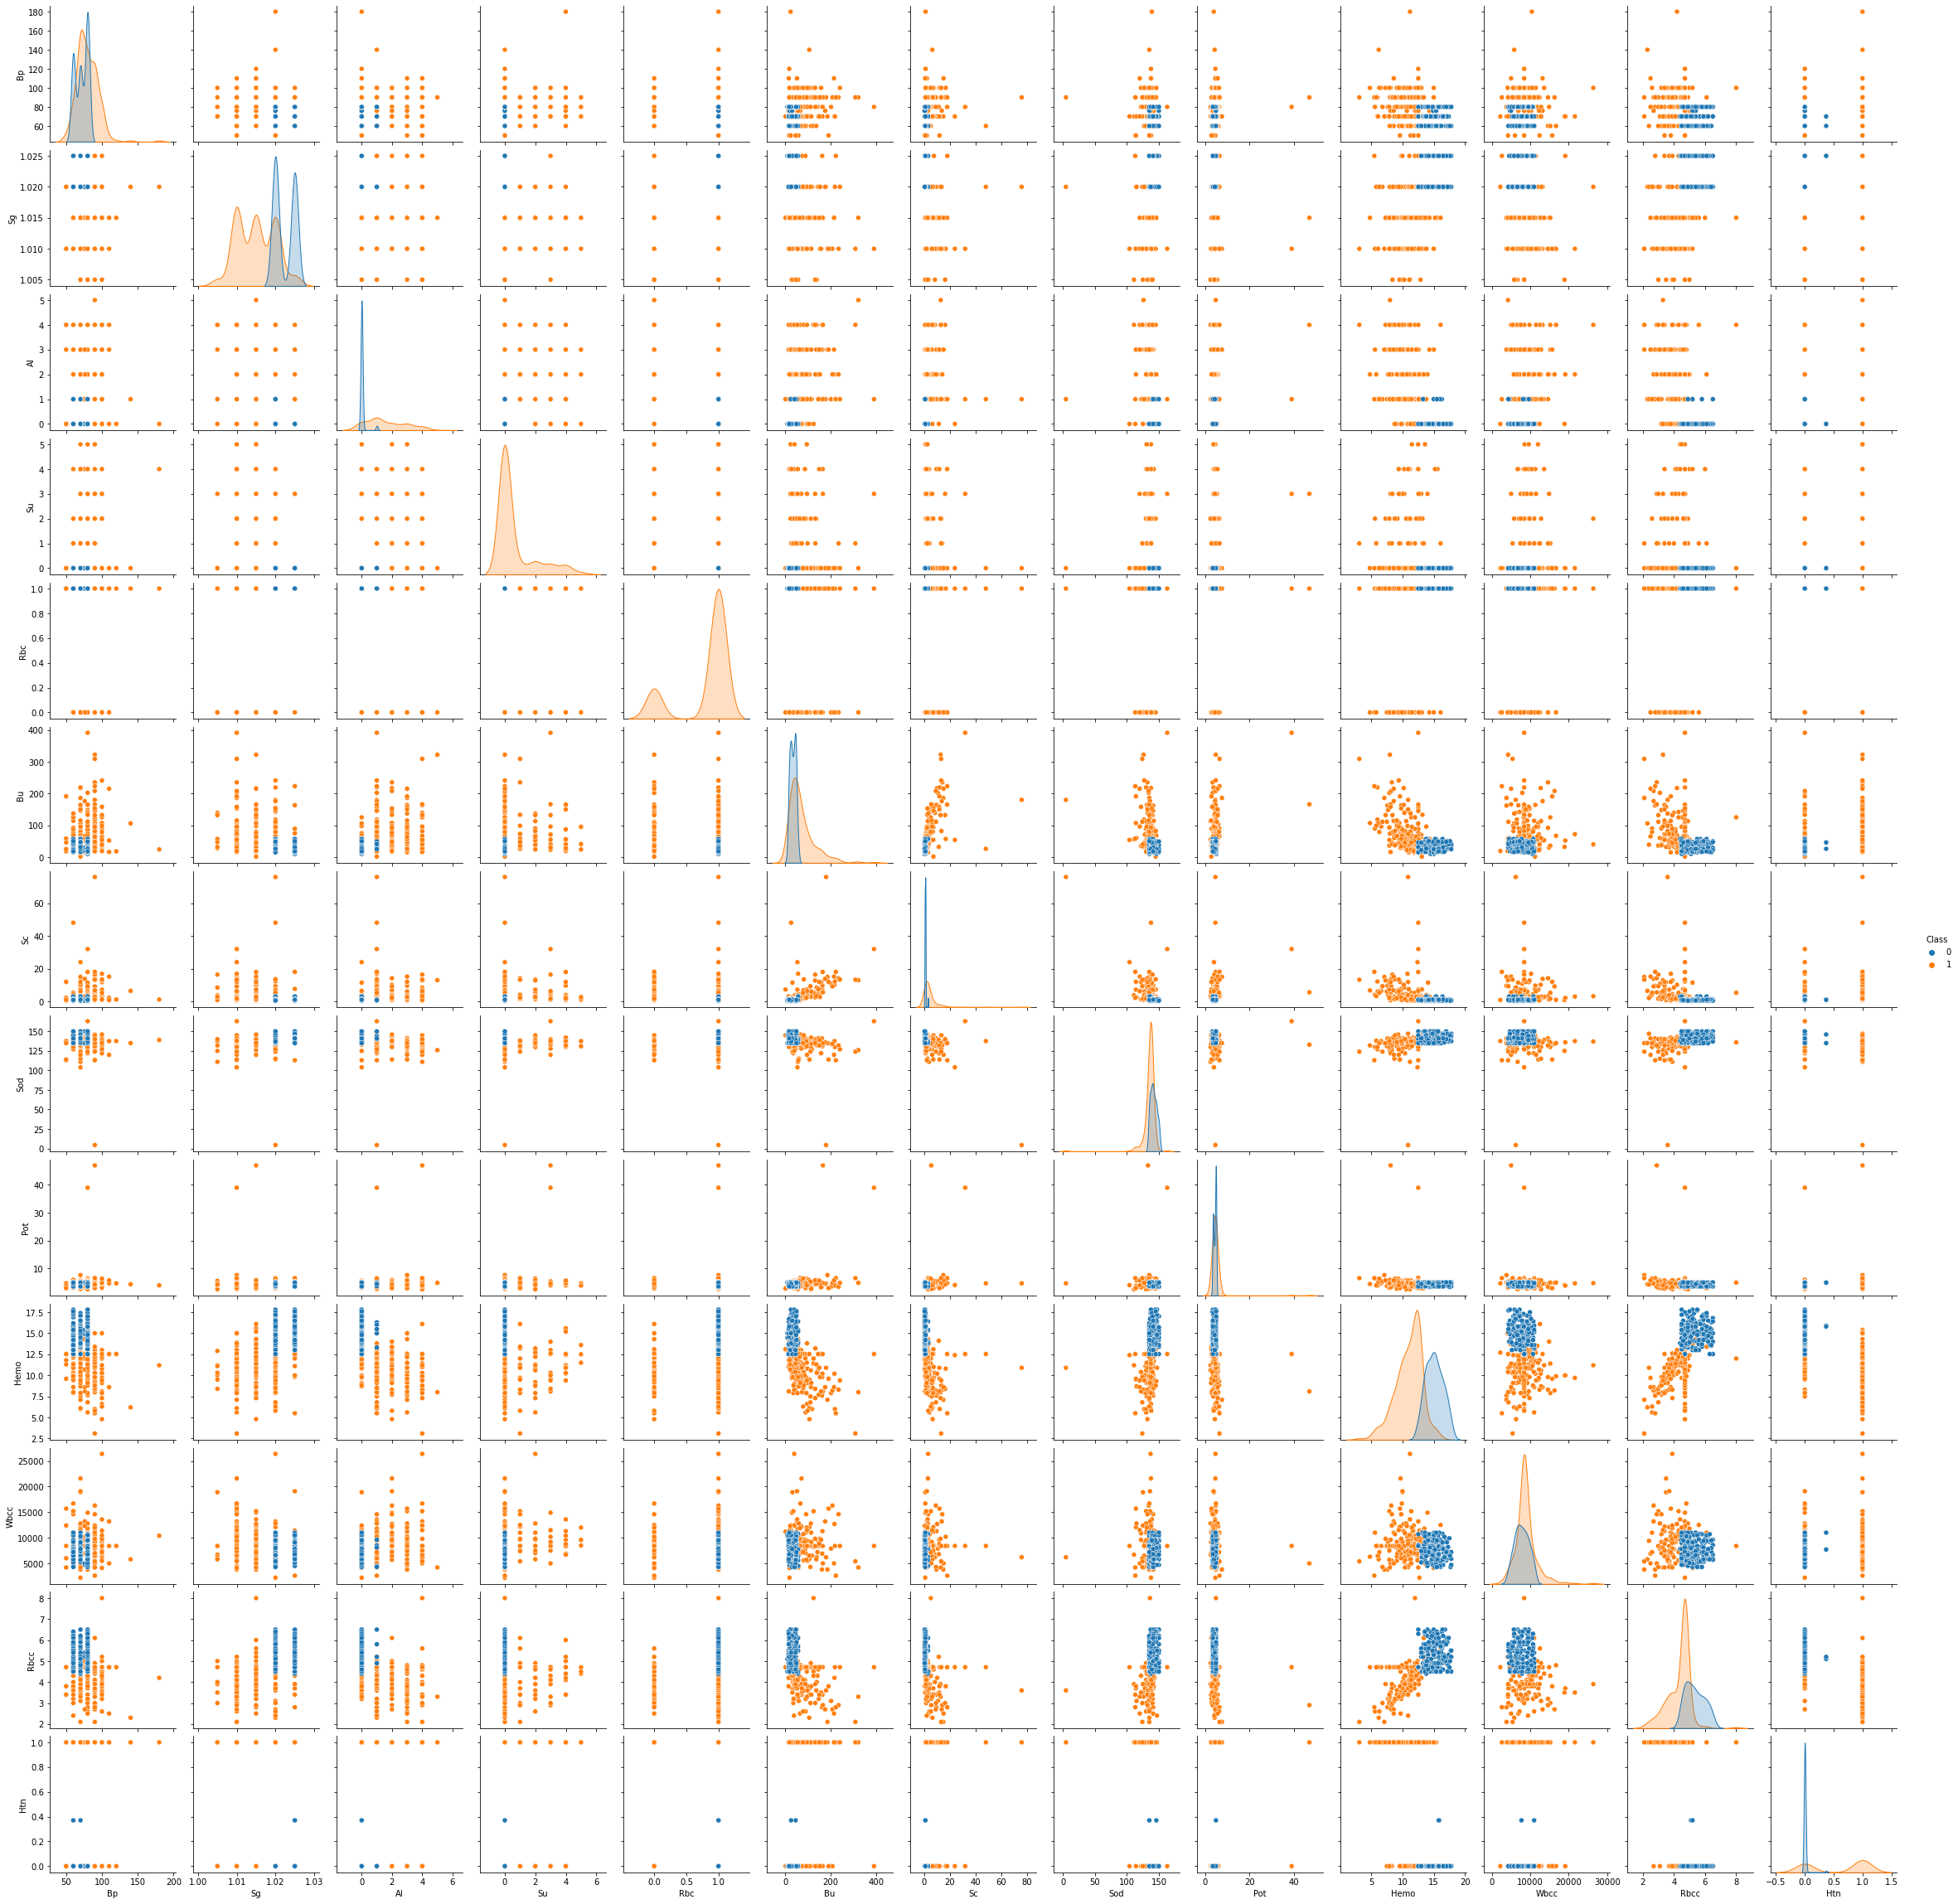

In [48]:
sns.pairplot(df,hue="Class")
plt.show()

In [9]:
df['Class'].value_counts()

1    250
0    150
Name: Class, dtype: int64

In [10]:
df.isnull().sum()

Bp       0
Sg       0
Al       0
Su       0
Rbc      0
Bu       0
Sc       0
Sod      0
Pot      0
Hemo     0
Wbcc     0
Rbcc     0
Htn      0
Class    0
dtype: int64

In [11]:
X = df.iloc[:, :-1]
Y = df.iloc[:, -1]

In [12]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
395    0
396    0
397    0
398    0
399    0
Name: Class, Length: 400, dtype: int64

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [14]:
len(X_train), len(X_test), len(y_train), len(y_test)

(320, 80, 320, 80)

In [15]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [16]:
 models = {
     'RandomForestClassifier' : RandomForestClassifier(),
     'GradientBoostingClassifier' : GradientBoostingClassifier(),
     'DecisionTreeClassifier' : DecisionTreeClassifier(),
     'XGBClassifier' : XGBClassifier(),
     'SVC' : SVC()
 }

In [17]:
def chech_score(X_train, X_test, y_train, y_test):
  np.random.seed(42)
  model_scores = {}
  for name, model in models.items():
    model.fit(X_train, y_train)
    model_scores[name] = model.score(X_test, y_test)

  return model_scores    

In [18]:
models = chech_score(X_train=X_train, X_test= X_test, y_train=y_train, y_test=y_test)
models

{'RandomForestClassifier': 1.0,
 'GradientBoostingClassifier': 1.0,
 'DecisionTreeClassifier': 0.9875,
 'XGBClassifier': 1.0,
 'SVC': 0.65}

In [19]:
fit_model = pd.DataFrame()
fit_model['Model Name'] = models.keys()
fit_model['Accuracy'] = models.values()
fit_model

,Model Name,Accuracy
0,RandomForestClassifier,1.0000
1,GradientBoostingClassifier,1.0000
2,DecisionTreeClassifier,0.9875
3,XGBClassifier,1.0000
4,SVC,0.6500


In [20]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score,classification_report, confusion_matrix


In [21]:
rfc = RandomForestClassifier()
gbc = GradientBoostingClassifier()
dtc = DecisionTreeClassifier()
xgb = XGBClassifier()
svc = SVC()

In [22]:
rf=rfc.fit(X_train,y_train)
gbcf=gbc.fit(X_train,y_train)
dtcf=dtc.fit(X_train,y_train)
xgbf=xgb.fit(X_train,y_train)
svcf=svc.fit(X_train,y_train)

In [23]:
rfp=rf.predict(X_test)
gbcp=gbcf.predict(X_test)
dtcp=dtcf.predict(X_test)
xgbfp=xgbf.predict(X_test)
svcp=svcf.predict(X_test)

In [24]:
print(classification_report(y_test,rfp))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        52

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



In [25]:
print(classification_report(y_test,gbcp))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        52

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



In [26]:
print(classification_report(y_test,dtcp))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        28
           1       1.00      0.98      0.99        52

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



In [27]:
print(classification_report(y_test,xgbfp))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        52

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



In [28]:
print(classification_report(y_test,svcp))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        28
           1       0.65      1.00      0.79        52

    accuracy                           0.65        80
   macro avg       0.33      0.50      0.39        80
weighted avg       0.42      0.65      0.51        80



C:\Users\rishu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rishu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rishu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [29]:
# np.random.seed(42)
ideal_model = RandomForestClassifier()
ideal_model.fit(X_train, y_train)
ideal_model.score(X_test, y_test)


1.0

In [30]:
y_pred = ideal_model.predict(X_test)


In [31]:
print(f"Accuracy : {accuracy_score(y_pred, y_test)*100:.2f}%")
print(f'precision_score : {precision_score(y_pred, y_test)}')
print(f'recall_score : {recall_score(y_pred, y_test)}')
print(f'f1_score : {f1_score(y_pred, y_test)}')
print(confusion_matrix(y_pred, y_test))

Accuracy : 100.00%
precision_score : 1.0
recall_score : 1.0
f1_score : 1.0
[[28  0]
 [ 0 52]]


In [32]:
print("\tRandom Forest Classifier Reports\t\n",pd.DataFrame([[accuracy_score(y_pred, y_test)*100,precision_score(y_pred, y_test),recall_score(y_pred, y_test),f1_score(y_pred, y_test)]],columns=['Accuracy','precision score','recall score','f1_score']))


	Random Forest Classifier Reports	
    Accuracy  precision score  recall score  f1_score
0     100.0              1.0           1.0       1.0


# Confusion metrix

<AxesSubplot:>

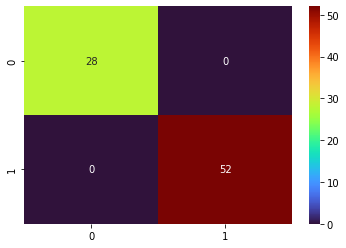

In [46]:
sns.heatmap(confusion_matrix(y_pred, y_test), annot=True, cmap='turbo')


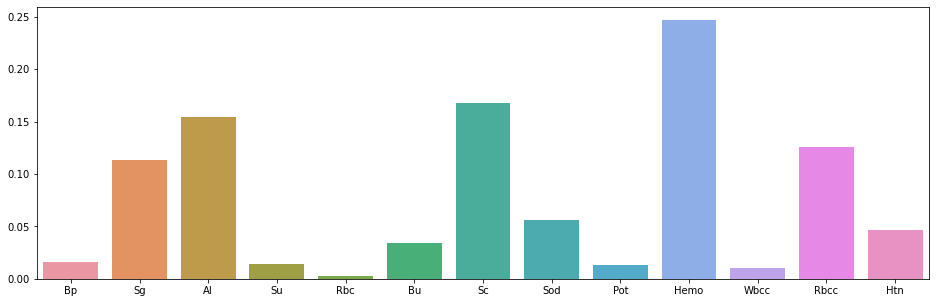

In [34]:
plt.figure(figsize=(16,5))
sns.barplot(y=ideal_model.feature_importances_,x=ideal_model.feature_names_in_)
plt.show()

In [35]:
features = [80.0,	1.020,	0.0,	0.0,	1.0,	49.0,	0.5,	150.0,	4.9,	15.7,	6700.0,	4.9,	0.0	]
features

[80.0, 1.02, 0.0, 0.0, 1.0, 49.0, 0.5, 150.0, 4.9, 15.7, 6700.0, 4.9, 0.0]

In [36]:
fet_pred = np.array([features])
fet_pred

array([[8.00e+01, 1.02e+00, 0.00e+00, 0.00e+00, 1.00e+00, 4.90e+01,
        5.00e-01, 1.50e+02, 4.90e+00, 1.57e+01, 6.70e+03, 4.90e+00,
        0.00e+00]])

In [37]:
pred = ideal_model.predict(fet_pred)
pred

C:\Users\rishu\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

# Let's predict the some simple value by giving the this model

In [38]:
if ideal_model.predict(pd.DataFrame([[80.0,1.020,0.0,0.0,1.0,49.0,0.5,150.0,4.9,15.7,6700.0,4.9 ,0.0]],columns=['Bp','Sg','Al','Su','Rbc','Bu','Sc','Sod','Pot','Hemo','Wbcc','Rbcc','Htn'])) == 1:
  print('Patients has no kidney Problem')

else:
  print('Patients has kidney Problem')  

Patients has kidney Problem


In [39]:
if ideal_model.predict(pd.DataFrame([[80.0,1.020,1.0,0.0,1.0,36.0,1.2,137.53,4.63,15.4,7800.0,5.20,1.0]],columns=['Bp','Sg','Al','Su','Rbc','Bu','Sc','Sod','Pot','Hemo','Wbcc','Rbcc','Htn'])) == 1:
  print('Patients has no kidney Problem')

else:
  print('Patients has kidney Problem')  

Patients has no kidney Problem


In [40]:
ideal_model.predict(pd.DataFrame([[80.0,1.020,0.0,0.0,1.0,49.0,0.5,150.0,4.9,15.7,6700.0,4.9 ,0.0]],columns=['Bp','Sg','Al','Su','Rbc','Bu','Sc','Sod','Pot','Hemo','Wbcc','Rbcc','Htn']))

array([0], dtype=int64)

# Let's Dump the model for use in website using Django 

In [41]:
import pickle as pkl

In [42]:
pkl.dump(ideal_model,open("kidney_model_upgrade.pkl","wb"))

In [44]:
new_model=pkl.load(open("kidney_model_upgrade.pkl","rb"))

In [45]:
new_model.predict(pd.DataFrame([[80.0,1.020,0.0,0.0,1.0,49.0,0.5,150.0,4.9,15.7,6700.0,4.9 ,0.0]],columns=['Bp','Sg','Al','Su','Rbc','Bu','Sc','Sod','Pot','Hemo','Wbcc','Rbcc','Htn']))

array([0], dtype=int64)